In [1]:
from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np


In [2]:
# model.peak_time

In [9]:
speed = 0.3
cfg = 'configs/west_box.yml' #'configs/east_box.yml' #'configs/Mississauga_cfg.yml' # 'configs/Point_Edward_cfg.yml' #
model = EVSpaceModel(cfg=cfg,ModelP_price_set_mechanism = 'none',ModelP_seed=50)  
print(model.seed)
model.run_model(240) #24*365   
# model.save()

mdf = model.datacollector.get_model_vars_dataframe()
model.seed


50


50

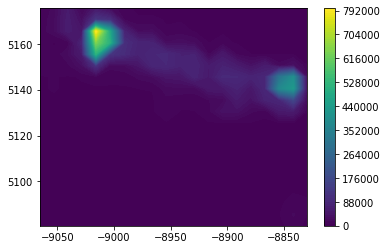

In [4]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)


<AxesSubplot:xlabel='hour'>

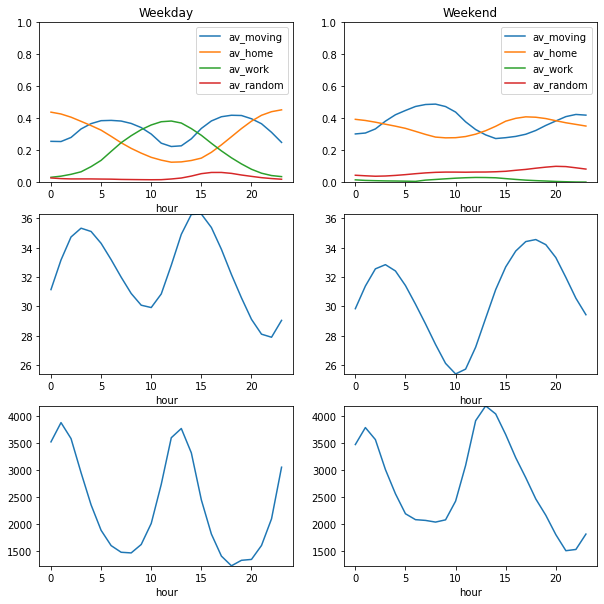

In [5]:
import pandas as pd
def is_business_day(date):
        return bool(len(pd.bdate_range(date,date)))
mdf['isbusinessday'] = [is_business_day(date) for date in mdf.date_time]
mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour
mdf=mdf[mdf['date_time']>pd.to_datetime('2022-01-03')]
hourly = mdf.groupby(['isbusinessday','hour']).mean()
mdfweekday = mdf[mdf['isbusinessday'] == True]
hourlyweekday = mdfweekday.groupby(['hour']).mean()
mdfweekend = mdf[mdf['isbusinessday'] == False]
hourlyweekend = mdfweekend.groupby(['hour']).mean()

fig, ax = plt.subplots(3,2,figsize=(10,10))

hourlyweekday[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0,0],title='Weekday',ylim=(0,1))
hourlyweekday['av_charge'].plot(ax=ax[1,0],ylim=(hourly['av_charge'].min(),hourly['av_charge'].max()))
hourlyweekday['charge_load'].plot(ax=ax[2,0],ylim=(hourly['charge_load'].min(),hourly['charge_load'].max()))
hourlyweekend[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0,1],title='Weekend',ylim=(0,1))
hourlyweekend['av_charge'].plot(ax=ax[1,1],ylim=(hourly['av_charge'].min(),hourly['av_charge'].max()))
hourlyweekend['charge_load'].plot(ax=ax[2,1],ylim=(hourly['charge_load'].min(),hourly['charge_load'].max()))

In [6]:
hourlyweekend

,av_charge,completed_trip,dead_cars,charge_load,av_moving,av_home,av_work,av_random,av_CP,lat,lon,seed,price,rep_agents,isbusinessday
hour,,,,,,,,,,,,,,,
0,29.840849,21.931034,0.121862,3477.045620,0.301138,0.392517,0.013897,0.042828,0.249621,46.198755,-80.37533,3514.0,7.4,2541.896552,0.0
1,31.380123,24.535714,0.103536,3791.742452,0.306821,0.385286,0.010429,0.039357,0.258107,46.198755,-80.37533,3514.0,7.4,2530.750000,0.0
2,32.553547,25.107143,0.090071,3568.669640,0.332500,0.374607,0.008714,0.036571,0.247607,46.198755,-80.37533,3514.0,7.4,2530.964286,0.0
3,32.839226,32.464286,0.078464,3013.632771,0.381107,0.362000,0.007393,0.038036,0.211464,46.198755,-80.37533,3514.0,7.4,2531.321429,0.0
4,32.410100,34.178571,0.078679,2564.200267,0.421107,0.349679,0.006714,0.041750,0.180750,46.198755,-80.37533,3514.0,7.4,2531.607143,0.0
5,31.415937,36.428571,0.081893,2193.410770,0.447893,0.336071,0.005750,0.046643,0.163643,46.198755,-80.37533,3514.0,7.4,2531.750000,0.0
6,30.147329,37.571429,0.077607,2083.893278,0.472893,0.317286,0.004429,0.052429,0.152964,46.198755,-80.37533,3514.0,7.4,2531.928571,0.0
7,28.804797,41.107143,0.082786,2070.020848,0.485214,0.298107,0.012286,0.057464,0.146929,46.198755,-80.37533,3514.0,7.4,2532.285714,0.0
8,27.403439,34.107143,0.105107,2038.855336,0.487643,0.281393,0.016393,0.060964,0.153607,46.198755,-80.37533,3514.0,7.4,2532.607143,0.0


In [7]:

mdf_2 = pd.read_csv('Data/mdf_Mississauga_355.csv')
new = mdf_2["COM"].str.replace(')','')
new = new.str.replace('(','')
new = new.str.split(",", n = 1, expand = True)
new = new.astype(float)

mdf_2['lat'] = new[1]
mdf_2['long'] = new[1]

FileNotFoundError: [Errno 2] No such file or directory: 'Data/mdf_Mississauga_355.csv'